In [54]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import MultipleLocator
from matplotlib import font_manager 

In [55]:
list_structure = ["01-Bi_c","02-Bi_m","03-Bi_t","04-Pb_c","05-Pb_h","06-PbBi","07-PbBi3","08-Pb4Bi"]

data_label = [[0.00000000, 0.05351090, 0.09254280, 0.14605360, 0.18508560, 0.25120730, 0.30471820, 0.37083990, 0.42401280, 0.47752360, 0.53069650 ],
              [0.00000000, 0.08464050, 0.11256170, 0.14013670, 0.22450800, 0.28000420, 0.37323470, 0.41232340 ],
              [0.00000000, 0.05292930, 0.09194720, 0.14487650, 0.18389440, 0.25036340, 0.30329270, 0.36976170, 0.42365850, 0.47658780, 0.53048450],
              [0.00000000, 0.07065980, 0.10125640, 0.19304620, 0.27958650, 0.31491640, 0.35024630 ],
              [0.00000000, 0.07901410, 0.12463290, 0.21587050, 0.23832780, 0.31734190, 0.36296070, 0.45419830, 0.47665550, 0.49911280 ],
              [0.00000000, 0.07987610, 0.12599250, 0.21822530, 0.26243440, 0.34231050, 0.38842690, 0.48065980, 0.52486890, 0.56907800],
              [0.00000000, 0.04403550, 0.06310350, 0.12030730, 0.17423960, 0.19625740, 0.21827520 ],
              [0.00000000, 0.13839890, 0.19104000, 0.21830500, 0.29813720, 0.35164880, 0.37804100, 0.45809040]]
                 
name_label = [['${{\\mathdefault{{\Gamma}}}}$', 'Z', 'D', 'B', '${{\\mathdefault{{\Gamma}}}}$', 'A', 'E', 'Z', 'C$_{{\\mathdefault{{2}}}}$', 'Y$_{{\\mathdefault{{2}}}}$', '${{\\mathdefault{{\Gamma}}}}$'],
              ['${{\\mathdefault{{\Gamma}}}}$', 'A', 'I$_{{\\mathdefault{{2}}}}$', 'M$_{{\\mathdefault{{2}}}}$', '${{\\mathdefault{{\Gamma}}}}$', 'Y', '${{\\mathdefault{{\Gamma}}}}$', 'V$_{{\\mathdefault{{2}}}}$'],
              ['${{\\mathdefault{{\Gamma}}}}$', 'Z', 'D', 'B', '${{\\mathdefault{{\Gamma}}}}$', 'A', 'E', 'Z', 'C$_{{\\mathdefault{{2}}}}$', 'Y$_{{\\mathdefault{{2}}}}$', '${{\\mathdefault{{\Gamma}}}}$'],
              ['${{\\mathdefault{{\Gamma}}}}$', 'X', 'U', '${{\\mathdefault{{\Gamma}}}}$', 'L', 'W', 'X'],
              ['${{\\mathdefault{{\Gamma}}}}$', 'M', 'K', '${{\\mathdefault{{\Gamma}}}}$', 'A', 'L', 'H', 'A', 'M', 'K'],
              ['${{\\mathdefault{{\Gamma}}}}$', 'M', 'K', '${{\\mathdefault{{\Gamma}}}}$', 'A', 'L', 'H', 'A', 'M', 'K'],
              ['${{\\mathdefault{{\Gamma}}}}$', 'X', 'U', '${{\\mathdefault{{\Gamma}}}}$', 'L', 'W', 'X'],
              ['${{\\mathdefault{{\Gamma}}}}$', 'T', 'H$_{{\\mathdefault{{2}}}}$', 'L', '${{\\mathdefault{{\Gamma}}}}$', 'S$_{{\\mathdefault{{0}}}}$', 'F', '${{\\mathdefault{{\Gamma}}}}$']
              ]
                
n = [510, 357, 510, 306, 459, 459, 306, 357]

In [72]:
# 图像函数

# 获取最大值最小值
def get_extremum(list1, list2):
    mx = np.max(np.concatenate((list1, list2)))
    mn = np.min(np.concatenate((list1, list2)))
    return mx, mn

#  设置坐标轴数点
def major_formatter_x(x, pos):
    return f'{x:.1f}'

def major_formatter_y(y, pos):
    return f'{y:.1f}'

def set_plotparam(plot_params):
    fig, ax = plt.subplots(figsize=(4,4),dpi=600)               # DPI设置
    # 全局设置字体及大小，设置公式字体即可，若要修改刻度字体，可在此修改全局字体
    font_path = "//home/hsh/changsk/font/"
    font_files = font_manager.findSystemFonts(fontpaths=font_path)
    for file in font_files:
        font_manager.fontManager.addfont(file)
    config = {
        "mathtext.fontset":'stix',
        "font.family":"Arial",
        "font.serif": ['serif'],
        "font.size": 10,            # 字号
        'axes.unicode_minus': False # 处理负号，即-号
    }
    rcParams.update(config)
    ax.spines['right'].set_visible(True)         # 坐标轴可见性 
    ax.spines['top'].set_visible(True)
    ax.spines['left'].set_linewidth(1.2)         # 坐标轴线框 
    ax.spines['bottom'].set_linewidth(1.2)
    ax.spines['bottom'].set_position(('data',plot_params['ys']))  # 移动x轴位置
    # plt.style.use
    # 设置坐标轴箭头
    #ax.plot(1, plot_params['ys'], ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    #ax.plot(plot_params['xs'], 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    plt.xlim(plot_params['xs'], plot_params['xe'])                               # x坐标轴刻度值范围
    plt.ylim(plot_params['ys'], plot_params['ye'])                               # y坐标轴刻度值范围
    plt.xlabel(plot_params['xlabel'],fontsize=12)                 # x坐标轴标题
    plt.ylabel(plot_params['ylabel'],fontsize=12)                 # y坐标轴标题
    
    # 创建x轴定位器，间隔2
    x_major_locator = MultipleLocator(plot_params['xmajor_locator'])
    # 创建y轴定位器，间隔5
    y_major_locator = MultipleLocator(plot_params['ymajor_locator'])
    # 设置x轴的间隔
    ax.xaxis.set_major_locator(x_major_locator)
    # 设置y轴的间隔
    ax.yaxis.set_major_locator(y_major_locator)
    
    # 修改有效小数位
    ax.xaxis.set_major_formatter(major_formatter_x)
    ax.yaxis.set_major_formatter(major_formatter_y)
    
    ax.tick_params(labelsize=11)  #刻度字体大小
    # 设置刻度线向外还是向内
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    return fig, ax

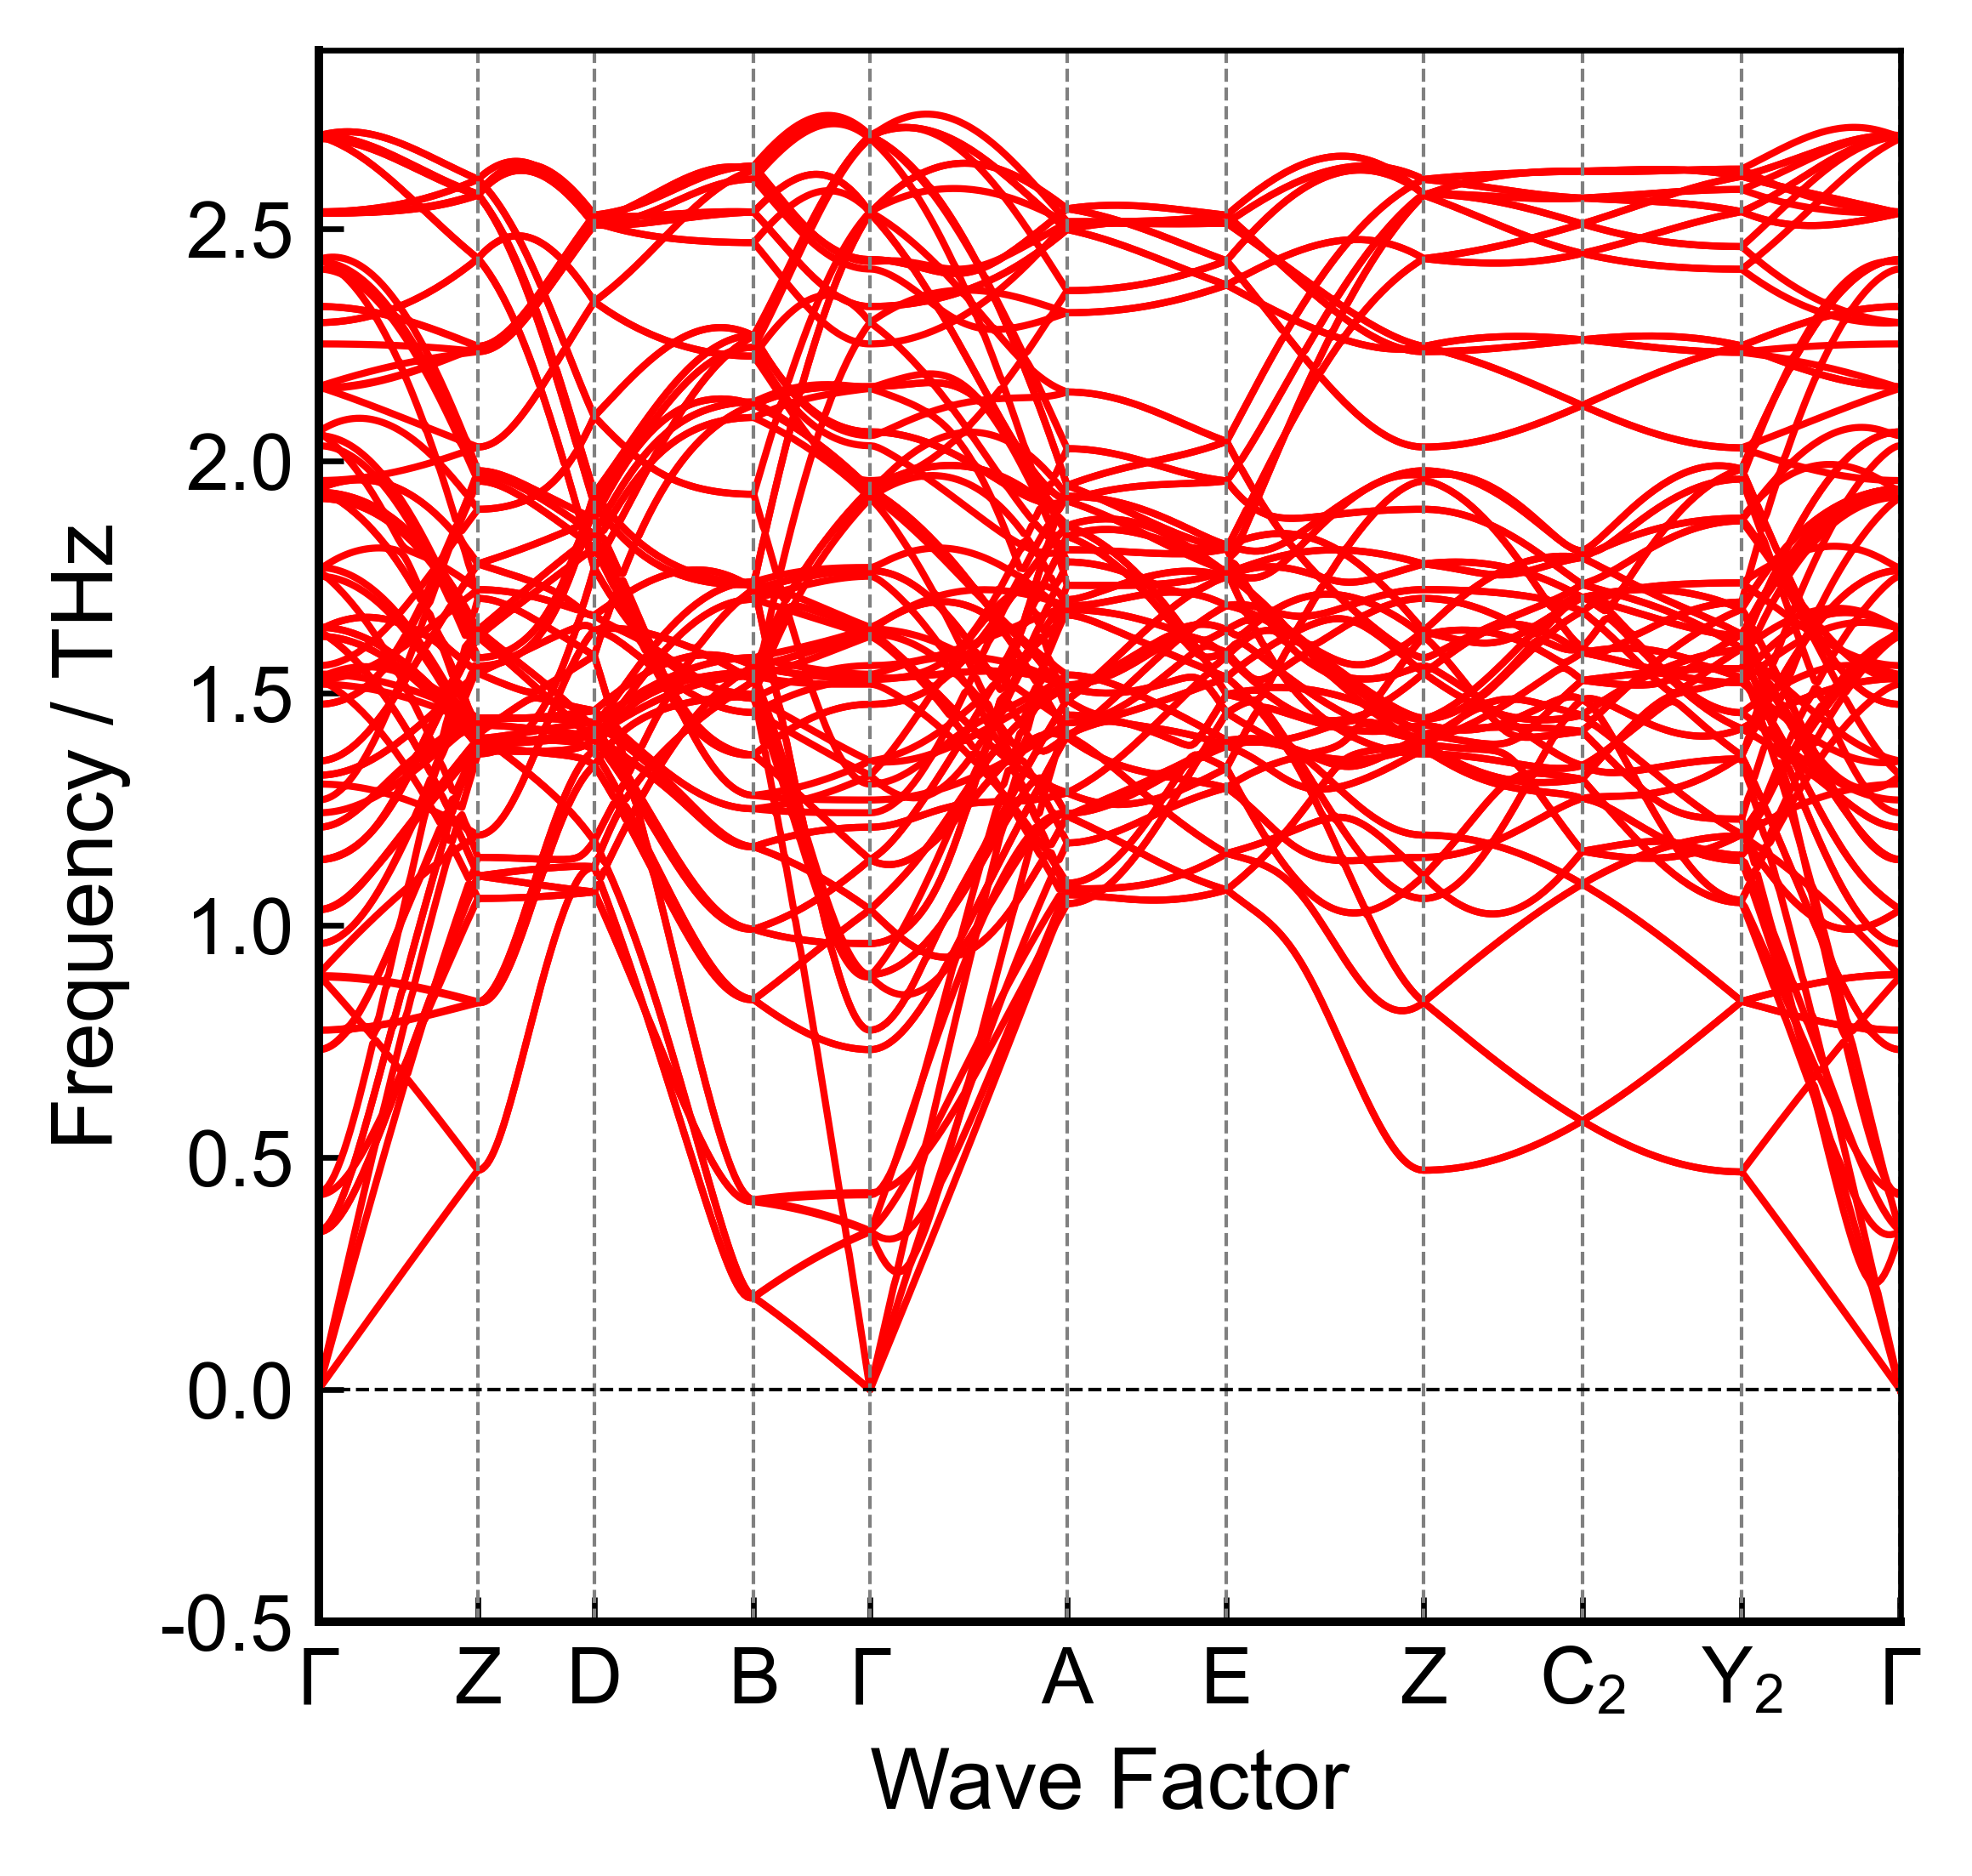

In [120]:
j=0
data = np.genfromtxt(f"./dp/{list_structure[j]}/band.txt")
xx, xn = get_extremum(data[:, 0],data[:, 0])
yx, yn = get_extremum(data[:, 1],data[:, 1])
plot_params = {
    "xs": xn,       # x轴起始坐标
    "xe": xx,        # x轴终点坐标
    "ys": -0.5,       # y轴起始坐标
    "ye": yx*1.05,        # y轴终点坐标
    "xlabel": r'Wave Factor',                    # x轴标题
    "ylabel": r'Frequency / THz',                    # y轴标题
    "xmajor_locator": 0.5,                # 设置x轴的间隔
    "ymajor_locator": 0.5,                # 设置y轴的间隔
}

fig, ax1 = set_plotparam(plot_params)

plt.xticks(data_label[j], 
           ['${{\\mathdefault{{\Gamma}}}}$', 'Z', 'D', 'B', '${{\\mathdefault{{\Gamma}}}}$', 'A', 'E', 'Z', 'C$_{{\\mathdefault{{2}}}}$', 'Y$_{{\\mathdefault{{2}}}}$', '${{\\mathdefault{{\Gamma}}}}$']
                      )
for i in range(int(len(data)/n[j])):
    ax1.plot(data[i * n[j] : (i + 1) * n[j], 0],data[i * n[j] : (i + 1) * n[j], 1], c='r', linewidth=1)
for i in range(len(data_label[j])):
    ax1.axvline(x=data_label[j][i],color="grey" ,linestyle='--', linewidth=0.5)
ax1.plot((-5,5), (0,0),c='black', linestyle='--',linewidth = 0.5)
# plt.savefig(f'{list_structure[j]}.png', bbox_inches='tight',dpi=300, transparent=True )
